Q1.a

In [1]:
import pandas as pd
from datetime import datetime

taxis = pd.read_csv('taxis.csv', encoding= 'unicode_escape')
taxis_df = pd.DataFrame(taxis)
taxis_df['pickup_date'] = pd.to_datetime(taxis_df['pickup']).dt.day
taxis_df['pickup_time'] = pd.to_datetime(taxis_df['pickup']).dt.time
taxis_df['dropoff_date'] = pd.to_datetime(taxis_df['dropoff']).dt.day
taxis_df['dropoff_time'] = pd.to_datetime(taxis_df['dropoff']).dt.time
print(taxis_df.head(5))



                pickup              dropoff  passengers  distance  fare   tip  \
0  2019-03-23 20:21:09  2019-03-23 20:27:24           1      1.60   7.0  2.15   
1  2019-03-04 16:11:55  2019-03-04 16:19:00           1      0.79   5.0  0.00   
2  2019-03-27 17:53:01  2019-03-27 18:00:25           1      1.37   7.5  2.36   
3  2019-03-10 01:23:59  2019-03-10 01:49:51           1      7.70  27.0  6.15   
4  2019-03-30 13:27:42  2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  pickup_date  \
0    UN/Turtle Bay South      Manhattan       Manhattan       

Q.1 b

In [2]:
print("The total fare of Green colured taxis is: " + str(taxis_df.loc[taxis_df['color'] == 'green', 'fare'].sum()))
print("The total number of passengers in Green colured taxis is: " + str(taxis_df.loc[taxis_df['color'] == 'green', 'passengers'].sum()))
print("The total distance travelled by Green colured taxis is: " + str(taxis_df.loc[taxis_df['color'] == 'green', 'distance'].sum()))
taxis_df['travel_time'] = pd.to_datetime(taxis_df['dropoff']) - pd.to_datetime(taxis_df['pickup'])
print("The total time travelled by Green colured taxis is: " + str(taxis_df.loc[taxis_df['color'] == 'green', 'travel_time'].sum()))
print()
print("The total fare of Yellow colured taxis is: " +  str(taxis_df.loc[taxis_df['color'] == 'yellow', 'fare'].sum()))
print("The total number of passengers in Yellow colured taxis is: " + str(taxis_df.loc[taxis_df['color'] == 'yellow', 'passengers'].sum()))
print("The total distance travelled by Yellow colured taxis is: " + str(taxis_df.loc[taxis_df['color'] == 'yellow', 'distance'].sum()))
print("The total time travelled by Yellow colured taxis is: " + str(taxis_df.loc[taxis_df['color'] == 'yellow', 'travel_time'].sum()))


The total fare of Green colured taxis is: 13788.15
The total number of passengers in Green colured taxis is: 1226
The total distance travelled by Green colured taxis is: 3345.95
The total time travelled by Green colured taxis is: 10 days 15:37:46

The total fare of Yellow colured taxis is: 70426.72
The total number of passengers in Yellow colured taxis is: 8676
The total distance travelled by Yellow colured taxis is: 16111.41
The total time travelled by Yellow colured taxis is: 53 days 10:53:19


Q. 2

In [3]:

pickup_dates = [10, 15, 20, 25, 30]
filtered_data = taxis_df[(taxis_df['payment'] == 'cash') & (taxis_df['pickup_date'].isin(pickup_dates))]

grouped = filtered_data.groupby('color')

# Initialize an empty DataFrame to store the results
GY_cash = pd.DataFrame(columns=['color', 'distance', 'pickup', 
                                'pickup_date', 'pickup_time', 'dropoff', 'dropoff_date', 'dropoff_time', 'fare'])
GY_cash_list = []
for pickup_date in pickup_dates:
    for cab_color in ['green', 'yellow']:
        date_filtered_data = filtered_data[(filtered_data['pickup_date'] == pickup_date) & (filtered_data['color'] == cab_color)]
        
        # Check if there are trips for the current date
        if not date_filtered_data.empty:
            # Find the trip with the longest distance for the current date
            longest_distance_trip = date_filtered_data.loc[date_filtered_data['distance'].idxmax()]
            # Append the longest distance trip to the GY_cash DataFrame
            GY_cash_list.append(longest_distance_trip)
        else:
            # If there are no trips for the current date, add a row with 0 values
            GY_cash_list.append({'pickup_date': pickup_date, 'colour': cab_color, 'distance': 0})

GY_cash = pd.DataFrame(GY_cash_list, columns=['color', 'distance', 'pickup', 'pickup_date', 'pickup_time', 'dropoff', 'dropoff_date', 'dropoff_time', 'fare'])

# Reset the index of the new DataFrame
GY_cash = GY_cash.reset_index(drop=True)
GY_cash = GY_cash.rename(columns={'distance': 'distance travelled', 'color': 'Color of the Cab' })
# Display the GY_cash DataFrame
print(GY_cash.head(5).to_string(index=False))


Color of the Cab  distance travelled              pickup  pickup_date pickup_time             dropoff  dropoff_date dropoff_time  fare
           green               16.01 2019-03-10 00:59:49           10    00:59:49 2019-03-10 01:36:25            10     01:36:25  47.0
          yellow               11.52 2019-03-10 00:13:12           10    00:13:12 2019-03-10 00:33:09            10     00:33:09  32.5
           green                4.71 2019-03-15 06:42:17           15    06:42:17 2019-03-15 06:54:38            15     06:54:38  15.0
          yellow               15.64 2019-03-15 16:45:55           15    16:45:55 2019-03-15 17:46:47            15     17:46:47  50.0
           green                6.66 2019-03-20 12:04:33           20    12:04:33 2019-03-20 12:28:07            20     12:28:07  20.0


Q.3 

In [4]:
max_distances = GY_cash.groupby('pickup_date')['distance travelled'].max().reset_index()

# Rename the 'distance travelled' column to 'Max Distance' for clarity
GY_maxDist = pd.merge(GY_cash, max_distances, on=['pickup_date', 'distance travelled'], how='inner')


# Display the GY_maxDist DataFrame
print(GY_maxDist)

  Color of the Cab  distance travelled               pickup  pickup_date  \
0            green               16.01  2019-03-10 00:59:49           10   
1           yellow               15.64  2019-03-15 16:45:55           15   
2           yellow               17.01  2019-03-20 17:22:33           20   
3           yellow               12.12  2019-03-25 05:33:43           25   
4           yellow               17.14  2019-03-30 14:56:08           30   

  pickup_time              dropoff  dropoff_date dropoff_time  fare  
0    00:59:49  2019-03-10 01:36:25            10     01:36:25  47.0  
1    16:45:55  2019-03-15 17:46:47            15     17:46:47  50.0  
2    17:22:33  2019-03-20 18:07:19            20     18:07:19  52.0  
3    05:33:43  2019-03-25 05:58:38            25     05:58:38  35.5  
4    14:56:08  2019-03-30 15:49:32            30     15:49:32  52.0  


Q.4 

In [5]:
def calculate_speed(row):
    distance_km = row['distance travelled']

    start_time = pd.to_datetime(row['pickup'])
    end_time = pd.to_datetime(row['dropoff'])
    
    # Calculate the time difference in seconds
    time_seconds = (end_time - start_time).total_seconds()
    
    # Calculate speed in m/s
    speed = (distance_km * 1000) / time_seconds
    
    return speed

GY_maxDist['speed'] = GY_maxDist.apply(calculate_speed, axis=1)

# Display the GY_maxDist DataFrame
print(GY_maxDist)

  Color of the Cab  distance travelled               pickup  pickup_date  \
0            green               16.01  2019-03-10 00:59:49           10   
1           yellow               15.64  2019-03-15 16:45:55           15   
2           yellow               17.01  2019-03-20 17:22:33           20   
3           yellow               12.12  2019-03-25 05:33:43           25   
4           yellow               17.14  2019-03-30 14:56:08           30   

  pickup_time              dropoff  dropoff_date dropoff_time  fare     speed  
0    00:59:49  2019-03-10 01:36:25            10     01:36:25  47.0  7.290528  
1    16:45:55  2019-03-15 17:46:47            15     17:46:47  50.0  4.282585  
2    17:22:33  2019-03-20 18:07:19            20     18:07:19  52.0  6.332837  
3    05:33:43  2019-03-25 05:58:38            25     05:58:38  35.5  8.107023  
4    14:56:08  2019-03-30 15:49:32            30     15:49:32  52.0  5.349563  


Q.5 

In [6]:
# Step 1: Filter the DataFrame for trips from 'Brooklyn' to 'Manhattan' with pickup dates between March 10 and March 25
filtered_trips = taxis_df[(taxis_df['pickup_borough'] == 'Brooklyn') & (taxis_df['dropoff_borough'] == 'Manhattan') & (taxis_df['pickup_date'].between(10, 25))]

# Step 2: Calculate the actual speed for each trip
def calculate_speed(row):
    distance_km = row['distance']  # Assuming you have a column 'distance_travelled' in your DataFrame
    start_time = pd.to_datetime(row['pickup'])
    end_time = pd.to_datetime(row['dropoff'])
    
    # Calculate the time difference in seconds
    time_seconds = (end_time - start_time).total_seconds()
    
    # Calculate speed in m/s
    speed = (distance_km * 1000) / time_seconds
    
    return speed

#print(filtered_trips.head(5))
filtered_trips['speed'] = filtered_trips.apply(calculate_speed, axis=1)

# Step 3: Compute the mean speed for green and yellow cars separately

mean_speed_green = filtered_trips[filtered_trips['color'] == 'green']['speed'].mean()
mean_speed_yellow = filtered_trips[filtered_trips['color'] == 'yellow']['speed'].mean()

print(f"Mean speed of green cars: {mean_speed_green} m/s")
print(f"Mean speed of yellow cars: {mean_speed_yellow} m/s")



Mean speed of green cars: 3.3573598559543405 m/s
Mean speed of yellow cars: 4.203137975821648 m/s


C:\Users\acer\AppData\Local\Temp\ipykernel_4840\357400391.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_trips['speed'] = filtered_trips.apply(calculate_speed, axis=1)


Q.6 

In [7]:
filtered_trips = taxis_df[(taxis_df['pickup_date'] == 17) &    
                          (pd.to_datetime(taxis_df['pickup']).dt.time >= pd.to_datetime('14:30:00').time()) &  # 2:30 PM
                          (pd.to_datetime(taxis_df['pickup']).dt.time >= pd.to_datetime('16:00:00').time())]  # 4:00 PM

# Step 3: Group by color and count pickups for each color
pickup_counts = filtered_trips.groupby('color').size().reset_index(name='pickup_count')

# Step 4: Determine which color had more pickups
most_picked_color = pickup_counts[pickup_counts['pickup_count'] == pickup_counts['pickup_count'].max()]

print(f"Color with the most pickups between 2:30 PM and 4:00 PM on March 17th is {most_picked_color['color'].to_string(index=False)} with {most_picked_color['pickup_count'].to_string(index=False)} pickup counts")
#print(most_picked_color)

Color with the most pickups between 2:30 PM and 4:00 PM on March 17th is yellow with 68 pickup counts


Q.7

In [8]:
grouped_data = taxis_df.groupby('pickup_zone')

# Step 2: Calculate the required statistics for each group
result_df = grouped_data.agg({
    'passengers': ['min', 'max', 'sum'],
    'fare': ['min', 'max', 'sum']
}).reset_index()

# Step 3: Rename the columns for clarity
result_df.columns = ['pickup_zone', 'min_passengers', 'max_passengers', 'sum_passengers', 'min_fare', 'max_fare', 'sum_fare']

# Step 4: Display the first 5 rows of the resulting DataFrame
print(result_df.head())


               pickup_zone  min_passengers  max_passengers  sum_passengers  \
0  Allerton/Pelham Gardens               1               1               2   
1            Alphabet City               1               2              11   
2                  Astoria               1               6             102   
3               Auburndale               1               1               1   
4             Battery Park               6               6               6   

   min_fare  max_fare  sum_fare  
0      10.5     54.16     64.66  
1       5.0     28.50    107.50  
2       2.5     36.50    514.50  
3      21.4     21.40     21.40  
4      19.0     19.00     19.00  


Q.8 

In [9]:
# Calculate the fuel cost for each trip
taxis_df['fuel_cost'] = (taxis_df['distance'] * 5.5) / 100 * 3

# Group the DataFrame by "pickup_zone" and "color"
grouped_data = taxis_df.groupby(['pickup_zone', 'color'])

def count_dates(series):
    return series.count()

# Calculate the required statistics for each group
result_df = grouped_data.agg({
    'pickup_date': count_dates,
    'passengers': 'sum',
    'distance': 'sum',
    'fare': 'sum',
    'fuel_cost': 'sum'
}).reset_index()

# Rename the columns for clarity
result_df.columns = ['pickup_zone', 'color', 'num_trips', 'total_passengers', 'total_distance', 'total_fare', 'total_fuel_cost']

# Split the result into two separate DataFrames, one for Yellow and one for Green cabs
Yellow_stats_df = result_df[result_df['color'] == 'yellow'].reset_index(drop=True)
Green_stats_df = result_df[result_df['color'] == 'green'].reset_index(drop=True)

# Display the resulting DataFrames
print("Yellow Cab Statistics:")
print(Yellow_stats_df.head(5))
print("\nGreen Cab Statistics:")
print(Green_stats_df.head(5))


Yellow Cab Statistics:
         pickup_zone   color  num_trips  total_passengers  total_distance  \
0      Alphabet City  yellow          9                11           25.17   
1            Astoria  yellow         13                18           23.38   
2       Battery Park  yellow          1                 6            5.39   
3  Battery Park City  yellow         43                59          174.16   
4            Bedford  yellow          1                 1            5.80   

   total_fare  total_fuel_cost  
0       107.5          4.15305  
1       109.0          3.85770  
2        19.0          0.88935  
3       681.5         28.73640  
4        22.0          0.95700  

Green Cab Statistics:
               pickup_zone  color  num_trips  total_passengers  \
0  Allerton/Pelham Gardens  green          2                 2   
1                  Astoria  green         52                84   
2               Auburndale  green          1                 1   
3                Bay Ridge  g

Q.9 

In [10]:
# Total statistics for Yellow cars
total_yellow_passengers = Yellow_stats_df['total_passengers'].sum()
total_yellow_distance = Yellow_stats_df['total_distance'].sum()
total_yellow_fare = Yellow_stats_df['total_fare'].sum()
total_yellow_fuel_cost = Yellow_stats_df['total_fuel_cost'].sum()

# Total statistics for Green cars
total_green_passengers = Green_stats_df['total_passengers'].sum()
total_green_distance = Green_stats_df['total_distance'].sum()
total_green_fare = Green_stats_df['total_fare'].sum()
total_green_fuel_cost = Green_stats_df['total_fuel_cost'].sum()

# Display the results
print("Total Statistics for Yellow Cars:")
print(f"Total Passengers: {Yellow_stats_df['total_passengers'].sum()}")
print(f"Total Distance (in kms): {Yellow_stats_df['total_distance'].sum()}")
print(f"Total Fare: ${Yellow_stats_df['total_fare'].sum()}")
print(f"Total Fuel Cost: ${Yellow_stats_df['total_fuel_cost'].sum()}")

print("\nTotal Statistics for Green Cars:")
print(f"Total Passengers: {Green_stats_df['total_passengers'].sum()}")
print(f"Total Distance (in kms): {Green_stats_df['total_distance'].sum()}")
print(f"Total Fare: ${Green_stats_df['total_fare'].sum()}")
print(f"Total Fuel Cost: ${Green_stats_df['total_fuel_cost'].sum()}")


Total Statistics for Yellow Cars:
Total Passengers: 8649
Total Distance (in kms): 16058.769999999999
Total Fare: $69781.22
Total Fuel Cost: $2649.69705

Total Statistics for Green Cars:
Total Passengers: 1222
Total Distance (in kms): 3345.95
Total Fare: $13760.65
Total Fuel Cost: $552.08175


Q.10

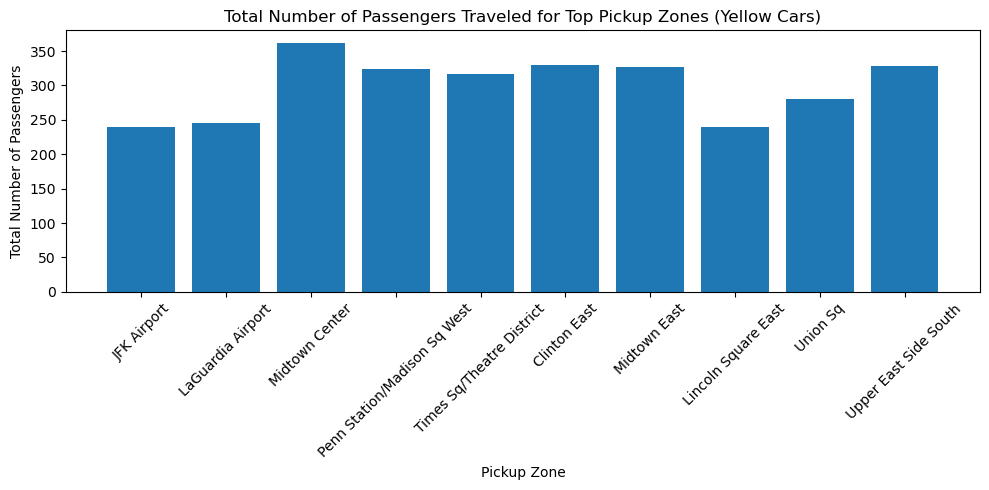

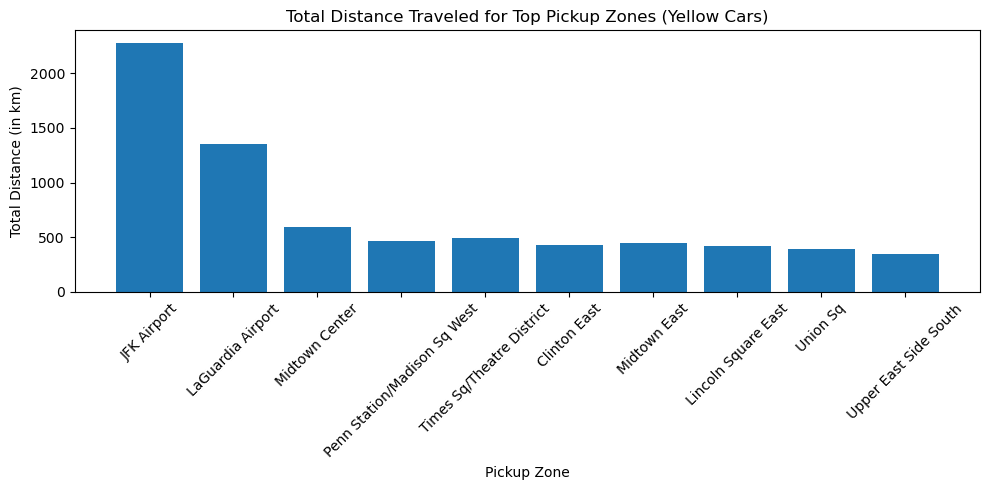

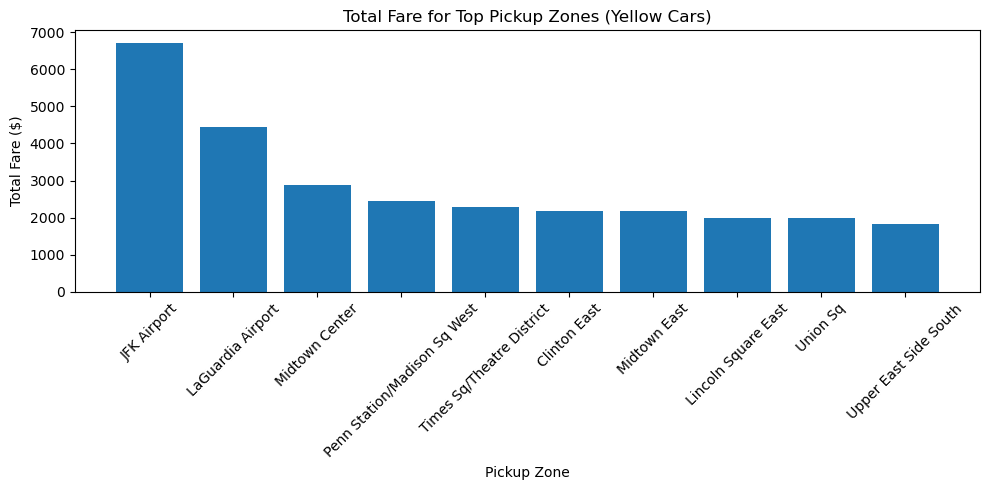

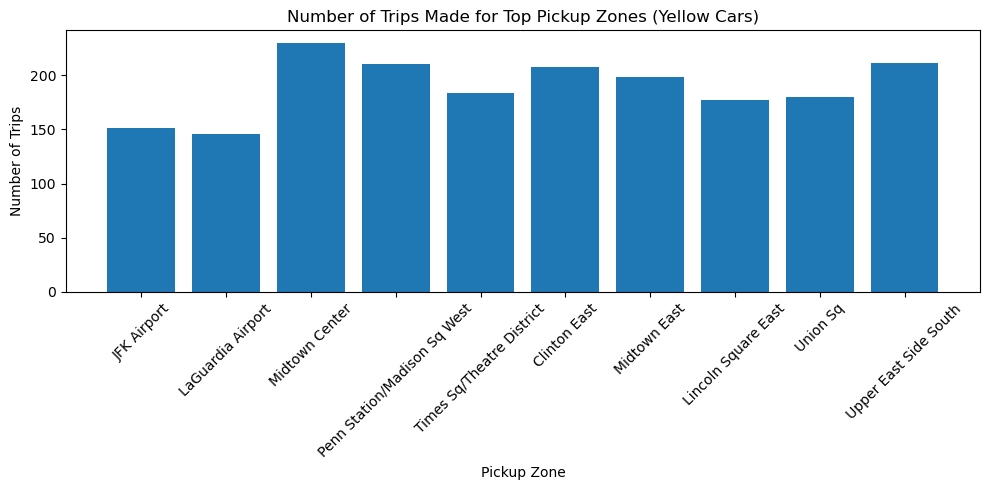

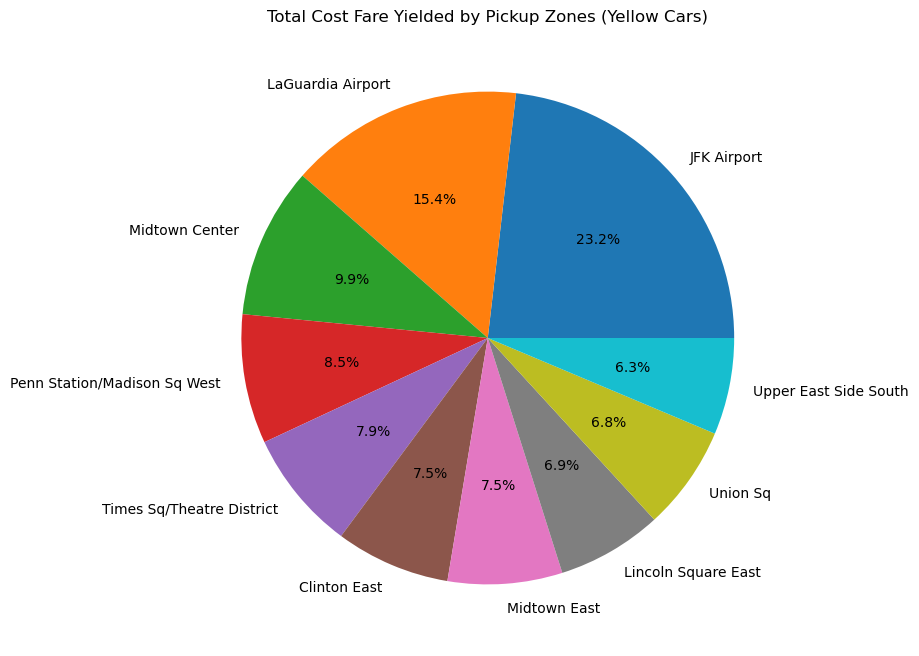

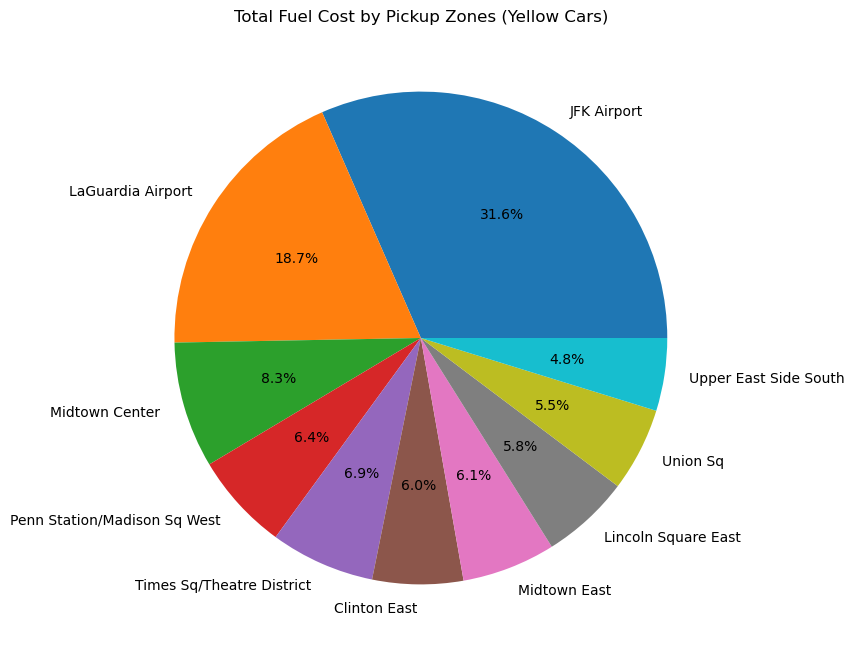

In [11]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'yellow_stats_df' containing statistics for Yellow cars

# Sort the DataFrame by total fare in descending order
yellow_stats_df = Yellow_stats_df.sort_values(by='total_fare', ascending=False)

# Select the top 10 pickup zones
top_yellow_zones = yellow_stats_df.head(10)

# Bar Chart for Total Number of Passengers Traveled
plt.figure(figsize=(10, 5))
plt.bar(top_yellow_zones['pickup_zone'], top_yellow_zones['total_passengers'])
plt.xlabel('Pickup Zone')
plt.ylabel('Total Number of Passengers')
plt.title('Total Number of Passengers Traveled for Top Pickup Zones (Yellow Cars)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar Chart for Total Distance Traveled
plt.figure(figsize=(10, 5))
plt.bar(top_yellow_zones['pickup_zone'], top_yellow_zones['total_distance'])
plt.xlabel('Pickup Zone')
plt.ylabel('Total Distance (in km)')
plt.title('Total Distance Traveled for Top Pickup Zones (Yellow Cars)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar Chart for Total Fare
plt.figure(figsize=(10, 5))
plt.bar(top_yellow_zones['pickup_zone'], top_yellow_zones['total_fare'])
plt.xlabel('Pickup Zone')
plt.ylabel('Total Fare ($)')
plt.title('Total Fare for Top Pickup Zones (Yellow Cars)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar Chart for Number of Trips Made
plt.figure(figsize=(10, 5))
plt.bar(top_yellow_zones['pickup_zone'], top_yellow_zones['num_trips'])
plt.xlabel('Pickup Zone')
plt.ylabel('Number of Trips')
plt.title('Number of Trips Made for Top Pickup Zones (Yellow Cars)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie Chart for Total Cost Fare Yielded by Zones
plt.figure(figsize=(8, 8))
plt.pie(top_yellow_zones['total_fare'], labels=top_yellow_zones['pickup_zone'], autopct='%1.1f%%')
plt.title('Total Cost Fare Yielded by Pickup Zones (Yellow Cars)')
plt.show()

# Pie Chart for Total Fuel Cost by Zones
plt.figure(figsize=(8, 8))
plt.pie(top_yellow_zones['total_fuel_cost'], labels=top_yellow_zones['pickup_zone'], autopct='%1.1f%%')
plt.title('Total Fuel Cost by Pickup Zones (Yellow Cars)')
plt.show()
